
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer




I have encounter someone facing the second challenge: solve the right problem, but didn’t realize it had already been solved or can’t reproduce it.

In the senior year of my undergraduate, we were assigned into groups to make capstone projects with some companies. I know there was a team in my class doing warehouse optimization with inventory data. They went to the right path at the beginning, colleting historical data, analyzing the relationship between the product orders and trying to make an optimal solution by assigning each product a location based on their ordering frequency and quantity. The analytical way was good but when they solved the problem with Python, it was difficult to get the solution due to the extremely huge size of inventory data. Thus, they utilized an optimization software which is free for college students. However, when they presented their solutions to the company, they found their solution cannot be reproduce easily by the company since the optimization software cost a great deal of money every year. But the company required a reproducible method for the warehouse optimization since the inventory kept changing significantly each season as the weather changed and technology improved. Therefore, even though the team solved the right problem, the solution is not reproducible and not useful for the company


# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer

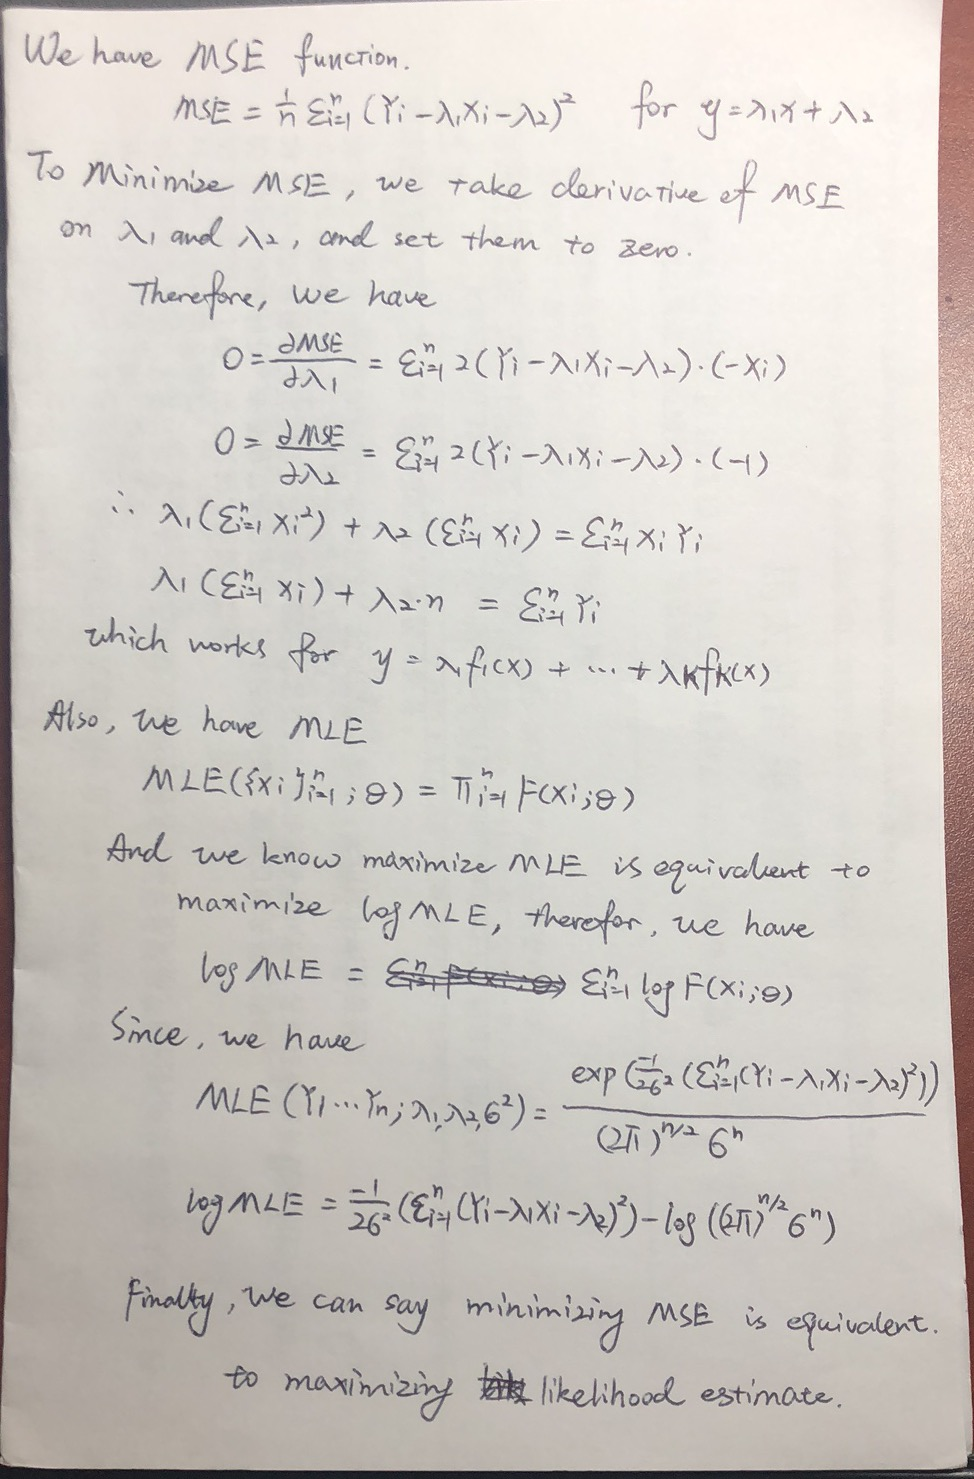

In [31]:
from IPython.display import Image
Image(filename='q2.jpg', width=500, height=100)

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer

Collinearity exists when, in a multiple linear regression, one of the predictors is linearly associated/dependent on another predictor.

MLR is to find the relationship between each independent variable and the dependent variable. The regression coefficients represent the change of the dependent variable for each one unit change in an independent variable when keeping all the other independent variables constant. However, if collinearity exists and independent variables are correlated, the change in one variable is associated with change in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. Thus, it is difficult for MLR to estimate the relationship between each independent variable and the dependent variable independently because the independent variables might change together.

To address collinearity, we can remove the strongly correlated predictors from the model. When there are two or more factors with a high VIF, we can remove one from the model. Without transforming variables, we can also use ridge regression to deal with collinearity, since ridge regression accepts some bias in the parameter estimates to reduce the variance.


# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
#read in csv file
train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.


In [3]:
#a.Print the shape (number of rows and columns) of the feature matrix X
X.shape

(188318, 14)

In [4]:
#a. print the first 5 rows
X.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [5]:
#b.Report the regression coefficient of each input feature
# Create linear regression object
regr1 = linear_model.LinearRegression()
# Train the model
dict_coeff={}
for i in range(0,len(regr1.fit(X, Y).coef_)):
    dict_coeff[X.columns.values[i]]=regr1.fit(X, Y).coef_[i]
dict_coeff

{'cont1': -2137.1112117119574,
 'cont2': 1762.2406162951947,
 'cont3': -56.57968487090608,
 'cont4': -301.17298060030487,
 'cont5': 30.032018189753256,
 'cont6': -557.2250991896584,
 'cont7': 1707.9552060753538,
 'cont8': 298.612406136149,
 'cont9': 2049.3791043759134,
 'cont10': -250.01986129134585,
 'cont11': -1732.34887444174,
 'cont12': 2724.38985823942,
 'cont13': -631.3012890197867,
 'cont14': 273.62600503925825}

In [6]:
#b. evaluate the model using mean absolute error (MAE)
#predict by X
pred=regr1.predict(X)
#calculate Mean Absolute Error
print ("The MAE for linear regression is", mean_absolute_error(Y,pred))

The MAE for linear regression is 1950.360626563984


c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

In [8]:
#c predict train
# Train the model
regr2 = linear_model.LinearRegression()
regr2.fit(X_train, Y_train)
train_pred=regr2.predict(X_train)
print ("The MAE for linear regression on the training set is",mean_absolute_error(Y_train,train_pred))

The MAE for linear regression on the training set is 1946.9866773014621


In [9]:
#c predict test
regr3 = linear_model.LinearRegression()
regr3.fit(X_train, Y_train)
test_pred=regr3.predict(X_test)
print ("The MAE for linear regression on the training set is", mean_absolute_error(Y_test,test_pred))

The MAE for linear regression on the training set is 1954.111059596165


The result of the two MAE didn't exceed our expectation as test set error tend to be bigger than training set error

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

In [10]:
import matplotlib.pyplot as plt
#d Plot the histogram of Y_train and see its distribution.
plt.hist(Y_train,50)
plt.axis([0, 25000, 0, 80000])

[0, 25000, 0, 80000]

[1.5, 5, 0, 15000]

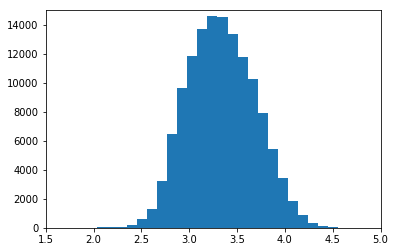

In [11]:
plt.hist(np.log10(Y_train),50)
plt.axis([1.5, 5, 0, 15000])

The distribution tend to be normal distributed as we take the log of Y_train.

In [12]:
regr4 = linear_model.LinearRegression()
regr4.fit(X_train, np.log(Y_train))
train_logpred=regr4.predict(X_train)
print ("The MAE for linear regression on the training set after taking log function is",mean_absolute_error(Y_train,np.exp(train_logpred)))

The MAE for linear regression on the training set after taking log function is 1797.4369165421042


In [13]:
regr5 = linear_model.LinearRegression()
regr5.fit(X_train, np.log(Y_train))
test_logpred=regr4.predict(X_test)
print ("The MAE for linear regression on the test set after taking log function is",mean_absolute_error(Y_test,np.exp(test_logpred)))


The MAE for linear regression on the test set after taking log function is 1810.6519682594767


The test set error is still bigger than training set error. However, after taking the log function on the training set, we have lower MSE in general. This is because the log transformation converts the exponential growth pattern to a linear growth pattern, and it simultaneously converts the multiplicative pattern to an additive seasonal pattern. These conversions make the transformed data much more suitable for fitting with linear model.

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

In [14]:
Y_trainlog=np.log(Y_train)#taking log of Y_train

In [15]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [16]:
#creating an lasso object
lasso = Lasso(random_state=0)
#selecting potential alphas
alphas =  10**np.linspace(10,-6,100)*0.5
tuned_parameters = [{'alpha': alphas}]
#doing 5 fold cross validation
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds,scoring='neg_mean_absolute_error', refit=False)
clf.fit(X_train, Y_trainlog)

C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([5.00000e+09, 3.44631e+09, ..., 7.25414e-07, 5.00000e-07])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [17]:
lambda_lasso=clf.best_params_
print("The best parameter using gridsearchcv on lasso is",lambda_lasso)

The best parameter using gridsearchcv on lasso is {'alpha': 6.309284415330092e-05}


In [18]:
#creating ridge object
Ridge = Ridge(random_state=0)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clfRidge = GridSearchCV(Ridge, tuned_parameters, cv=n_folds,scoring='neg_mean_absolute_error', refit=False)
clfRidge.fit(X_train, Y_trainlog)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([5.00000e+09, 3.44631e+09, ..., 7.25414e-07, 5.00000e-07])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [19]:
lambda_ridge=clfRidge.best_params_
print("The best parameter using gridsearchcv on lasso is",lambda_ridge)

The best parameter using gridsearchcv on lasso is {'alpha': 13.5929412136647}


2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)


In [20]:
#creating a list of coefficients
coefs_ridge=[]
for a in alphas:
    ridge_model = linear_model.Ridge(alpha=a)
    ridge_model.fit(X_train, Y_trainlog)
    coefs_ridge.append(ridge_model.coef_)

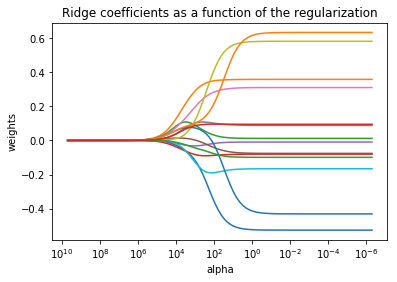

In [21]:
# Display results
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
ax = plt.gca()

ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [22]:
#creating a list of coefficients
coefs_lasso=[]
for a in alphas:
    lasso_model = linear_model.Lasso(alpha=a)
    lasso_model.fit(X_train, Y_trainlog)
    coefs_lasso.append(lasso_model.coef_)

C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


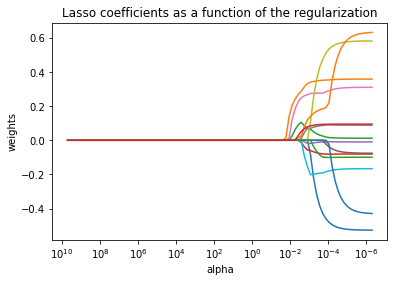

In [23]:
# Display results
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
ax_lasso = plt.gca()

ax_lasso.plot(alphas, coefs_lasso)
ax_lasso.set_xscale('log')
ax_lasso.set_xlim(ax_lasso.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Based on the two graphs, the coefficient of the attributes in Lasso Model tend to have a small coefficient with relatively higher alpha compare to the coefficient of the attributes in Ridge Model. This might result from the fact that Lasso method overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients of the attributes but setting them to zero if they are not relevant. 

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [24]:
#Ridge
Ridge=linear_model.Ridge(alpha=13.5929412136647)
result_ridge=Ridge.fit(X_train, Y_trainlog).predict(X_test)
print ("The MAE for ridge model on the training data is", mean_absolute_error(Y_test,np.exp(result_ridge)))

The MAE for ridge model on the training data is 1810.6310418084493


In [25]:
#Lasso
Lasso=linear_model.Lasso(alpha=6.309284415330092e-05)
result_Lasso=Lasso.fit(X_train, Y_trainlog).predict(X_test)
print ("The MAE for lasso model on the training data is",mean_absolute_error(Y_test,np.exp(result_Lasso)))

The MAE for lasso model on the training data is 1810.6424216634994


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)


In [26]:
from sklearn.linear_model import LassoCV
cv_lasso=LassoCV(alphas=None, cv=10, max_iter=10000)
cv_lasso.fit(X_train,Y_trainlog)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [27]:
#print the best parameters
alpha_lasso=cv_lasso.alpha_
print("the best parameters using LassoCV on Lasso is", alpha_lasso)

the best parameters using LassoCV on Lasso is 1.742378003185893e-05


In [28]:
Lasso=linear_model.Lasso(alpha=1.742378003185893e-05)
cvlasso_result=Lasso.fit(X_train, Y_trainlog).predict(X_test)
print("The MAE of lasso on the test set is",mean_absolute_error(Y_test,np.exp(cvlasso_result)))

The MAE of lasso on the test set is 1810.6363540763562


In [29]:
dict_coeff_lassocv={}
for i in range(0,len(Lasso.coef_)):
    dict_coeff_lassocv[X.columns.values[i]]=Lasso.coef_[i]
dict_coeff_lassocv

{'cont1': -0.5171120606676773,
 'cont2': 0.35693216098370895,
 'cont3': 0.012615260927005488,
 'cont4': -0.08068484903807831,
 'cont5': -0.009504372178176795,
 'cont6': -0.0688132498634748,
 'cont7': 0.30609697849502643,
 'cont8': 0.08840323957712086,
 'cont9': 0.5721647664360536,
 'cont10': -0.16869083430391965,
 'cont11': -0.35348215946590084,
 'cont12': 0.5542052817960368,
 'cont13': -0.09951851472410715,
 'cont14': 0.09436383809697307}

# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer

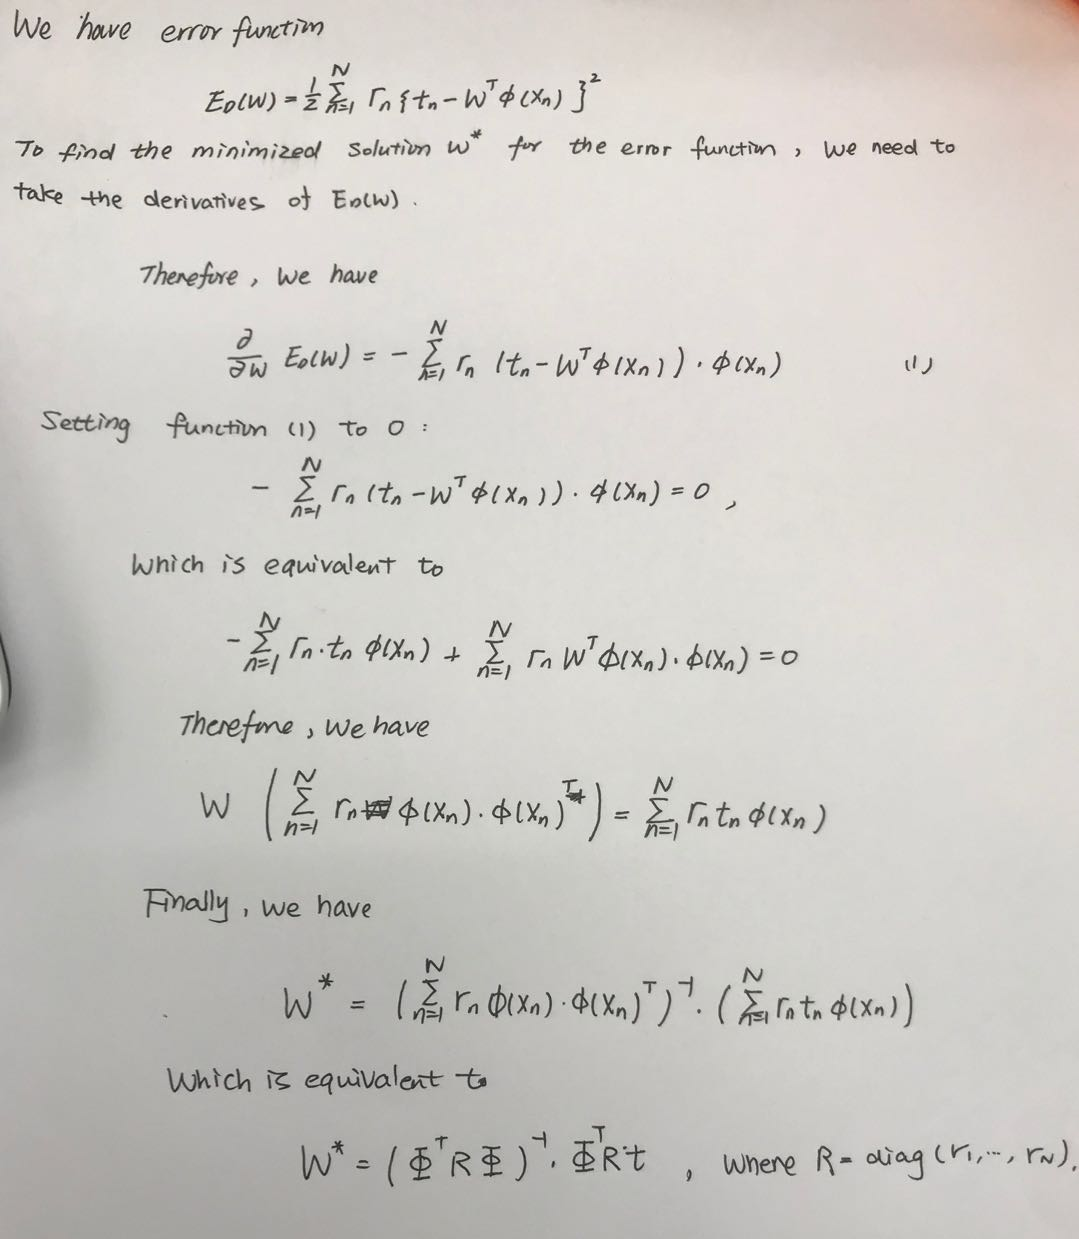

In [30]:
from IPython.display import Image
Image(filename='q6.jpg', width=500, height=100)

#### (i). Data Dependent Noise Variance (ii). replicated data points

$r_n$ from a data dependent noise variance could be seen as $\beta$ in the maximum liklihood function, which acts like a precision noise parameter. The inverse of the noise precision is given by the residual variance
of the target values around the regression function.

$r_n$ from a replicated data points perspective, act as a weighting measure for each single datapoints.To put it another way, $r_n$ replicates certain data points, resulting having more replicated observations. On the contrary, $r_n$ can also cancel out the effect from higher amount of similar datapoints. 